In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [6]:
df = pd.read_csv('df.csv')
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2283743,2,2019-02-19T08:02:58Z,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1567861,2,2017-02-13T20:51:52Z,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-423709,2,2020-05-22T18:20:00Z,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-864136,2,2020-03-03T07:47:18Z,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2792470,2,2020-01-22T08:05:34Z,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5000 non-null   object 
 1   Severity               5000 non-null   int64  
 2   Start_Time             5000 non-null   object 
 3   End_Time               5000 non-null   object 
 4   Start_Lat              5000 non-null   float64
 5   Start_Lng              5000 non-null   float64
 6   End_Lat                4506 non-null   float64
 7   End_Lng                4506 non-null   float64
 8   Distance(mi)           5000 non-null   float64
 9   Description            5000 non-null   object 
 10  Number                 1697 non-null   float64
 11  Street                 5000 non-null   object 
 12  Side                   5000 non-null   object 
 13  City                   4999 non-null   object 
 14  County                 5000 non-null   object 
 15  Stat

In [27]:
severity_classes = list(np.arange(1,5))
severityclasses = pd.api.types.CategoricalDtype(ordered=True, categories=severity_classes)
df['Severity'] = df['Severity'].astype(severityclasses);

severity_counts= df.groupby('Severity').size()
severity_counts = severity_counts.reset_index(name='count')
severity_counts 


,Severity,count
0,1,50
1,2,3635
2,3,1103
3,4,212


How many accidents and how severe they are?

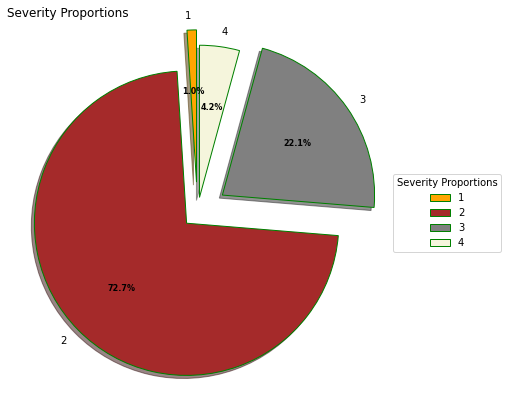

In [58]:
explode = (0.2, 0.1, 0.2, 0.1)
  
# Creating color parameters
colors = ( "orange", "brown",
          "grey", "beige")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(severity_counts['count'], 
                                  autopct = lambda pct: func(pct, severity_counts['count']),
                                  explode = explode, 
                                  labels = severity_counts['Severity'],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, severity_counts['Severity'],
          title ="Severity Proportions",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Severity Proportions",loc="left")

# show plot
plt.show()

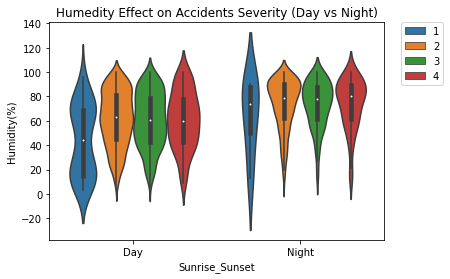

In [57]:
#df['Humidity(%)']
ax = sns.violinplot(data=df,x='Sunrise_Sunset', y="Humidity(%)",hue="Severity");
ax.set_title('Humedity Effect on Accidents Severity (Day vs Night)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)